# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data

## Get the Data

Download it, and run ""tar xzf housing.tgz"" to decompress the file and extract the CSV file, but it is preferable to create a small function to do that. It is useful in particular if data changes regularly, as it allows you to write a small script that you can run whenever you need to fetch the latest data (or you can set up a scheduled job to do that automatically at regular intervals). Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

Since we arleady have the downloaded data, and now developing a function to get the data from the specific folder.

In [2]:
import os                                           # os module provides functions for interacting with the operating system
import pandas as pd                                 # pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,

# Function to load data from a folder containing multiple csv files (can merges all csv files into one dataframe)
def get_data_locally(folder_path):
    """Load csv data from folder containing atleast 1 csv file"""
    dataframes = [] 

    for file in os.listdir(folder_path):                     # os.listdir() method in Python is used to get the list of all files and directories in the specified directory.
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            dataframe = pd.read_csv(file_path)
            dataframes.append(dataframe)
    if len(dataframes) == 0:
        raise Exception("No csv files found in folder")
    else:
        return pd.concat(dataframes, ignore_index=True, axis=0)              # axis=0 means rows, axis=1 means columns - The axis=0 parameter of pd.concat() is used to concatenate the dataframes along the rows, and ignore_index=True is used to reset the index of the concatenated dataframe.
                                                                  


# Another function which only reads one csv file from the folder (never merges multiple csv files)
#def load_data_from_folder(folder_path):
#    """Load data from a folder containing a single CSV file"""
#    csv_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.csv')]
 #   if len(csv_files) == 0:
 #       print('No CSV files found in folder')
  #      return None
   # elif len(csv_files) > 1:
    #    print('More than one CSV file found in folder')
    #    return None
    #else:
     #   file_path = os.path.join(folder_path, csv_files[0])
      #  return pd.read_csv(file_path)

In [3]:
folder_path = "datasets/housing"
housing = get_data_locally(folder_path)

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.shape, housing.info()

housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

This means we have a data of 20,640 districts, each with 10 attributes and without missing data (except total_bedroom has 20,433 instead of 20,640). We know each row represents one district.  

In [5]:
# Summary of Numerical variables (attributes)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### making Histogram for each attribute to observe the distribution of the data

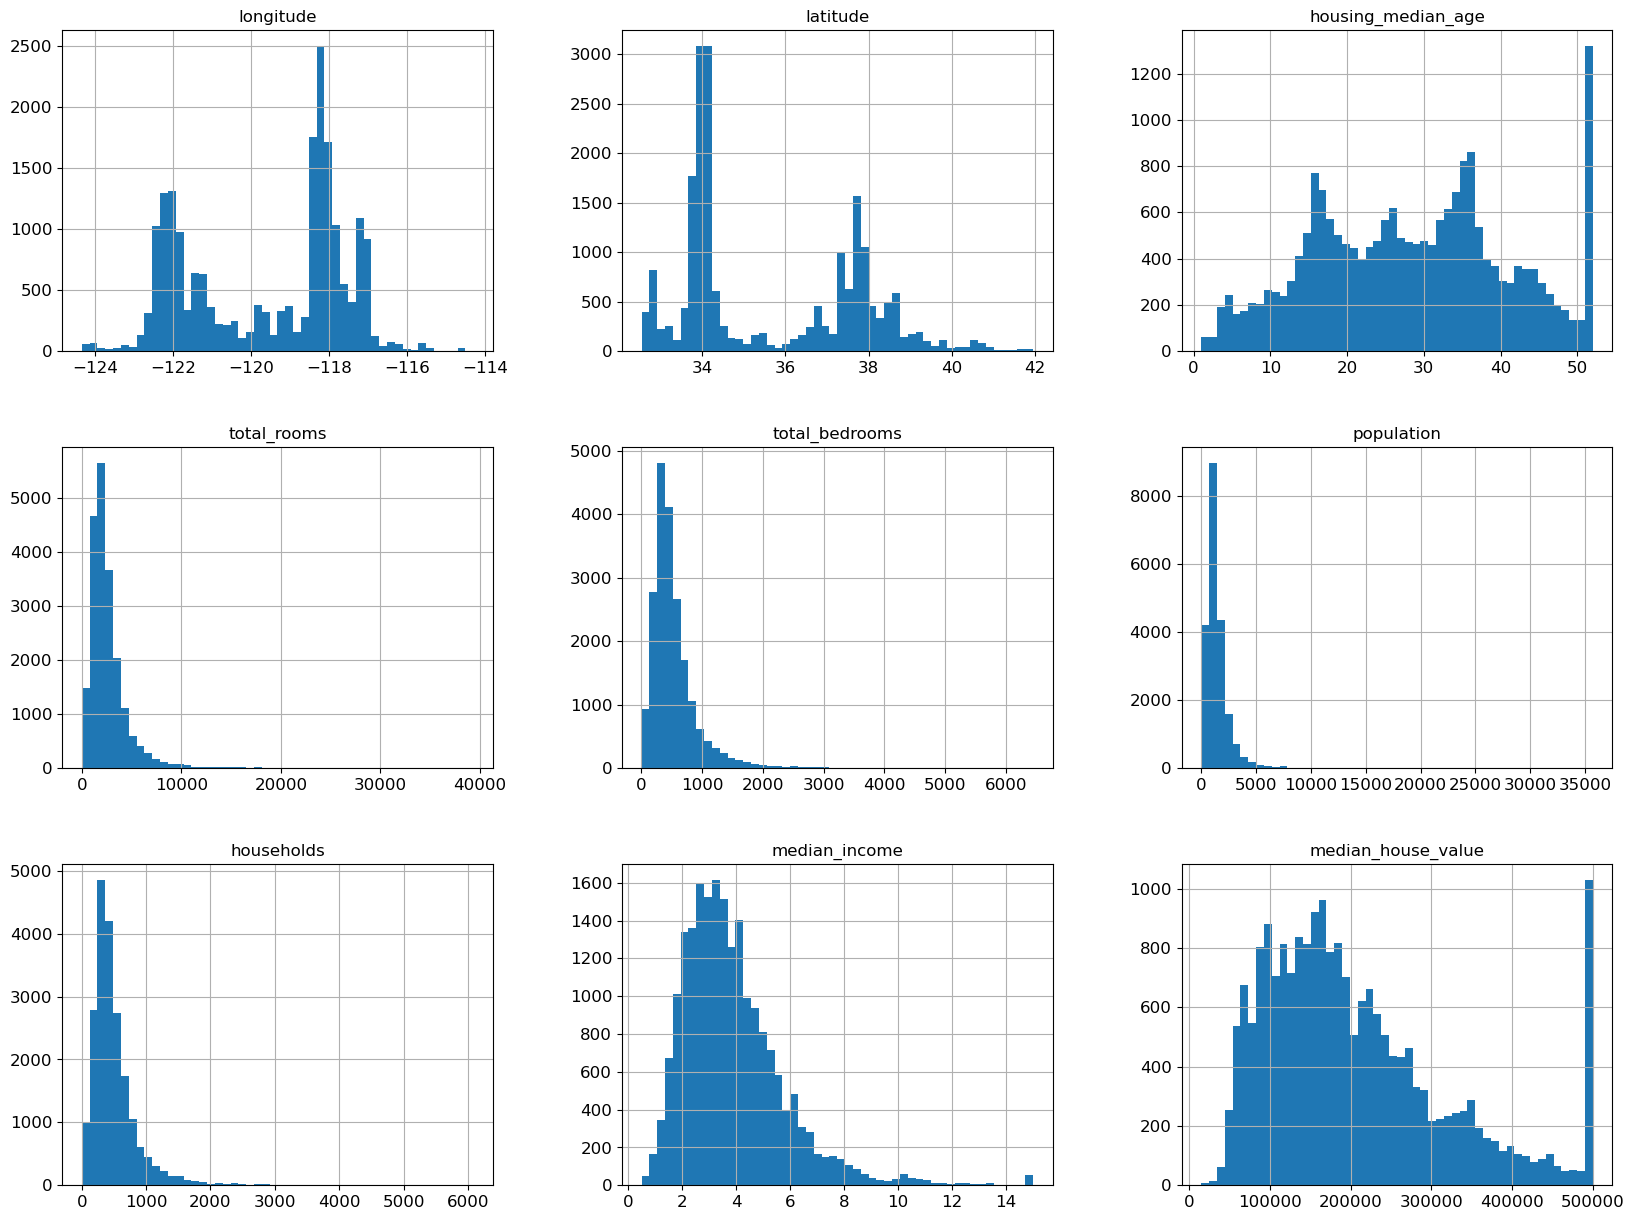

In [6]:
%matplotlib inline                      
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Observations:
* Median income is not in US dollars. However, it is scaled and capped in $10k ranges (e.g., 3.0 actually means about $30,000).
* Housing median age and median house value were capped. The median value can be a bit of a problem, as ML ago thinks the house value doesn't go beyond $500,000. One way to solve this is to collect proper labels for districts whose labels were capped. Another way is to remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).
* Attributes have very different scales.
* Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some ML algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.


### Create a Test Set

Creating a test set is important, without much exploration of the given data. If the test set is not created, then the generalization might able to give a quite optimistic picture, which does not reflect the actual performance of the model. Thus, the "Data snooping bias" can be avoided by creating a test set.

In [7]:
import numpy as np

# creating a function that splits data with random shuffling

def split(data, test_ratio):
    shuffle = np.random.permutation(len(data))        # creates a random permutation of the data
    test_size = int(len(data) * test_ratio)            # integer value of test data size
    test_indices = shuffle[:test_size]                # first test data size elements
    train_indices = shuffle[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]    # iloc is used to select rows and columns by number


In [8]:
train_set, test_set = split(data = housing, test_ratio=0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


One drawback of the split function, it always takes new rows for test set, whenever we relode the data. This gives inconsistency in our Analysis, and the model will never perform optimally. The easiest solution is to use scikit-learn function train_test_split() to split the data into train and test set.

The scikit-learn function does not only efficiently splits, but allows a random seed option to be set, so that the same split can be reproduced in future. This is useful when we want to reproduce the same split in future, or when we want to compare the performance of different models on the same split.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), " are train set rows and ", len(test_set), " are test set rows")

16512  are train set rows and  4128  are test set rows


Since we have a sufficiently large dataset, the random sampling with a specified seed worked. However, in case of small dataset, it is important to ensure the population or subject dynamics to avoid sampling bias. (better use stratified sampling for small datasets).

Assuning the median income is an important attribute to predict median House price. Thus, we need to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, we need to create an income category attribute. Let's look at the median income histogram more closely.
 

<Axes: >

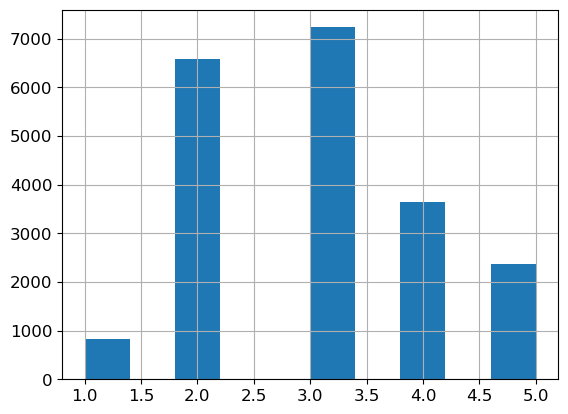

In [10]:
housing["income_bracket"] = pd.cut(housing["median_income"],                  # pd.cut() function is used to segment and sort data values into bins
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],      # bins are the intervals in which the data is to be sorted
                                labels=[1, 2, 3, 4, 5])                    # labels are the names given to the bins

housing["income_bracket"].hist()

Now based on income category, we can do stratified sampling for the test set. For this, we can use Scikit-Learn's StratifiedShuffleSplit class.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

str_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)   # n_splits is the number of re-shuffling & splitting iterations
for train_index, test_index in str_split.split(housing, housing["income_bracket"]):
    str_train_set = housing.loc[train_index]
    str_test_set = housing.loc[test_index]

In [12]:
# to check 

str_train_set["income_bracket"].value_counts() / len(str_train_set)

# It now satisfies the stratified sampling requirement. We can now remove the income_bracket attribute so the data is back to its original
# state, however, I choose not to do that because I want to keep the test set for later use.

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_bracket, dtype: float64

In [13]:
# Now making a compy of train set, to avoind distorting the original data, while manipulating it.

housing = str_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_bracket      16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [14]:
# Looking for correlations

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)      # corr of each attribute with median_house_value (-1 being negative correlation and 1 being positive correlation)


C:\Users\Naveed Ul Mustafa\AppData\Local\Temp\ipykernel_8896\1703034520.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

It appears median income has a sufficiently +ve corr. Alternatively, we can use pandas to calculate the correlation matrix and show the correlation matrix in a heatmap.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

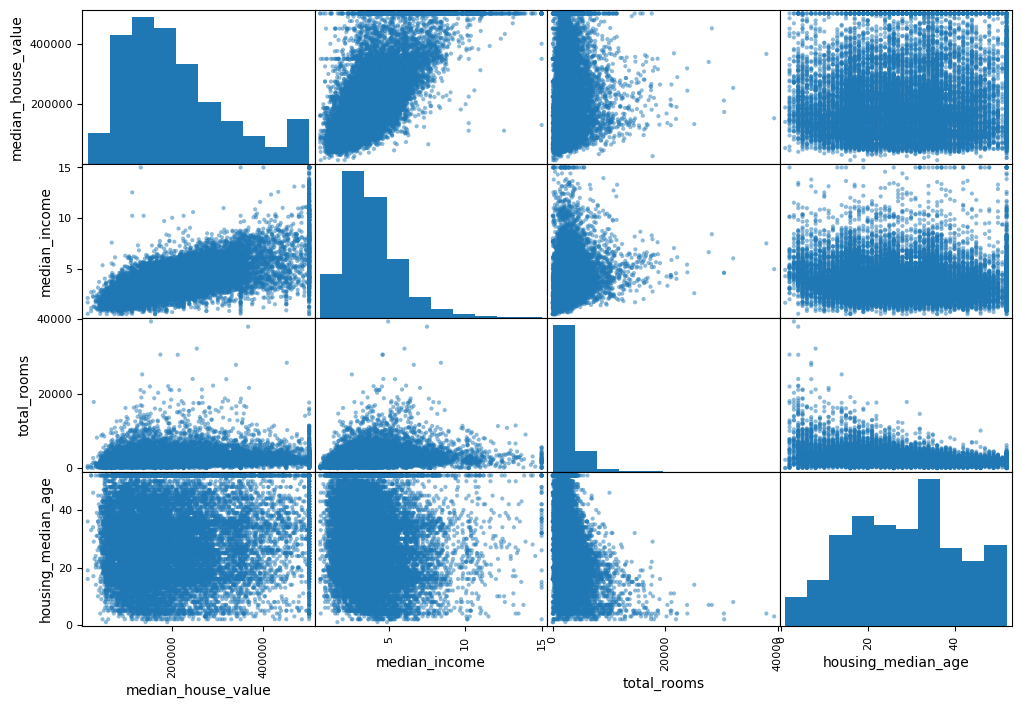

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]   # taking intentionally few attributes to see the correlation

scatter_matrix(housing[attributes], figsize=(12, 8))      # plotting a scatter matrix (12 x 8 is the size of the plot)

Since median income appear to be the most influencing attribute, we can zoom in on their correlation scatterplot.

<Axes: xlabel='median_income', ylabel='median_house_value'>

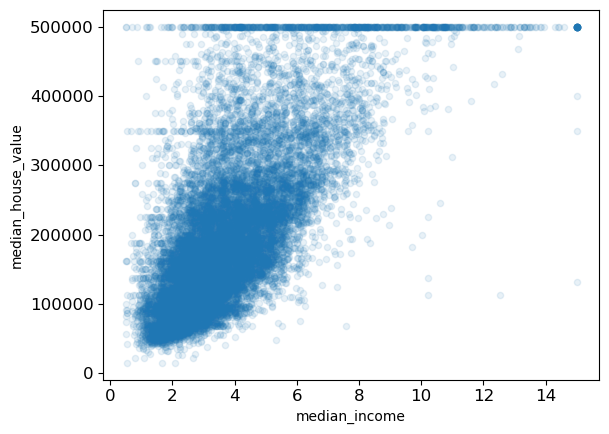

In [16]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)   # alpha is the transparency of the points

shows a +ve strong relation with median house value.

### Experimenting with Attribute Combinations

This involves attribute transformation (e.g tail heavy attributes might transforme into log to smooth out the outliers). Also, create new and adequate features, which means someting to analysis. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let's create these new attributes:

In [17]:
# creating new attributes

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]     
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [18]:
# checking corr matix again
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Naveed Ul Mustafa\AppData\Local\Temp\ipykernel_8896\1718287044.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

However, the steps we did were important to enhance given info, however, in this cases it does not appears to be affecting more on the median price.

### Prepare the Data for Machine Learning Algorithms


In [19]:
# drop the median price column from training data
housing = str_train_set.drop("median_house_value", axis=1)   # axis=1 means columns
housing_label = str_train_set["median_house_value"].copy()   # copy of the median price column as labels


### Clean Data

We know there is some missing values. Possible treatments are:
* Get rid of the corresponding districts.                 housing.dropna(subset=["total_bedrooms"])
* Get rid of the whole attribute.                         housing.drop("total_bedrooms", axis=1)
* Set the values to some value (zero, the mean, the median, etc.).    median = housing["total_bedrooms"].median()
                                                                housing["total_bedrooms"].fillna(median, inplace=True)


However, its important to note that the data loss should never be a priority. We opt for 3rd option and insert the median value in the missing data. Either we hardcode this or use functions from scikit-learn to do this. A SimpleImputer from scikit-learn can takecare of issing values from whole data. important: one need to make a copy of data, which contains no categorical variable, as the imputer can only work on numerical data.



In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")   # imputer is used to fill missing values

housing_only_num_var = housing.drop("ocean_proximity", axis=1)   # drop the categorical attribute 
imputer.fit(housing_only_num_var)   # fit the imputer instance to the training data



imputer.statistics_   # the imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

Since we only had one attribute with missing variable, therefore the values are for no of bedrooms. However, if we had more attributes with missing values, then we can use the following code to impute the missing values.

In [23]:
# using trained imputer to transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_only_num_var)   # the result is a plain Numpy array containing the transformed features
X

X.shape

# we can use fit_transform() method to do both the steps at once, instead of fit() and transform() separately - its more convenient (sometime
# optimized as well)


(16512, 9)

### Handling Text and Categorical Attributes
Since most ML Algos work with nos, therefore it is important to convert the only categorical var into no. For this we use Scikit-learn Ordinal Class

In [24]:
housing_cat = housing[["ocean_proximity"]]   # creating a dataframe of only categorical attribute
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_categorical = ordinal_encoder.fit_transform(housing_cat)   # thranforming the whole dataset
housing_categorical[:10]      # the output is a Numpy array (list of 1D arrays  ) containing the transformed features


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
# to check the categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
# Hot encoder (output is a scipy Matrix instead of Numpy array)
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)        
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After onehot
encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for a single 1 per row.

## Custom Transformers (really imp and must be revisit)